In [1]:
#import các thư viện cần thiết
!pip install imageio

In [2]:
pip install scipy

In [3]:
pip install scikit-image

In [8]:
#2. Viết chương trình xử lý anhr đơn giản.
#2.1 Nạp ảnh sử dụng thư viện python Image Library
from PIL import Image
import numpy as np
img = Image.open('bird.png')
img.show()

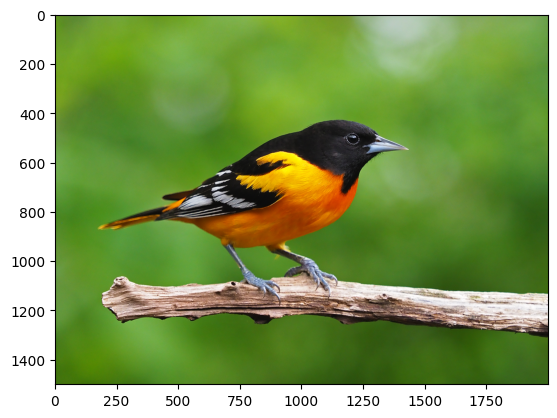

In [5]:
#2.2 Nạp ảnh sử dụng lệnh thư viện imageio
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png')
plt.imshow(data)
plt.show()

In [7]:
#2.3 Độ phân giải ảnh
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode='L')
plt.imshow(data,  cmap='gray')
plt.show()

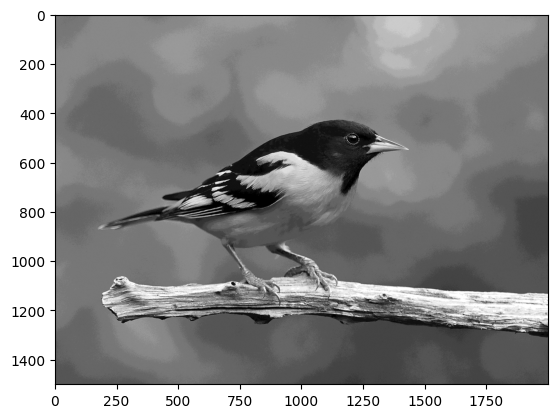

In [9]:
#Viết ct nạp ảnh grayscale và giảm 4 bit thấp, giữ 4 bit cao. Lưu ảnh với tên là birF0.png
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh grayscale
data = iio.imread('bird.png', mode='L').astype(np.uint8)

# Giảm 4 bit thấp, giữ lại 4 bit cao
data_reduced = (data >> 4) << 4

# Lưu ảnh mới với tên birF0.png
iio.imwrite('birF0.png', data_reduced)

# Hiển thị ảnh đã xử lý
plt.imshow(data_reduced, cmap='gray')
plt.show()

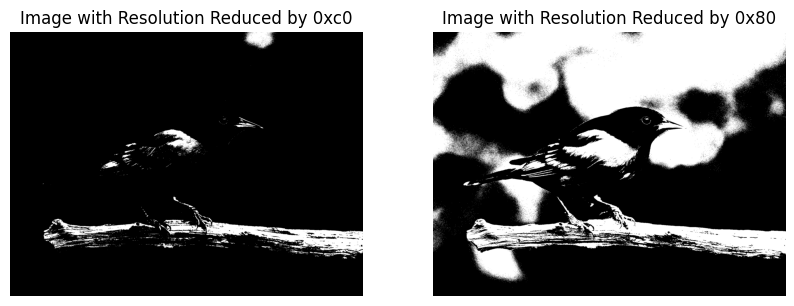

In [10]:
#viết chương trình tạo ảnh mới birdC0.png và bird80.png
#với mức giảm intensity resolution là 0xc0 và 0x80

import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh grayscale
data = iio.imread('bird.png', mode='L')

# Giảm độ phân giải cường độ theo mức giảm cường độ 0xc0 (192)
data_c0 = (data // 192) * 192

# Giảm độ phân giải cường độ theo mức giảm cường độ 0x80 (128)
data_80 = (data // 128) * 128

# Lưu ảnh mới với tên birdC0.png và bird80.png
iio.imwrite('birdC0.png', data_c0)
iio.imwrite('bird80.png', data_80)

# Hiển thị ảnh đã xử lý
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(data_c0, cmap='gray')
plt.title('Image with Resolution Reduced by 0xc0')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(data_80, cmap='gray')
plt.title('Image with Resolution Reduced by 0x80')
plt.axis('off')

plt.show()


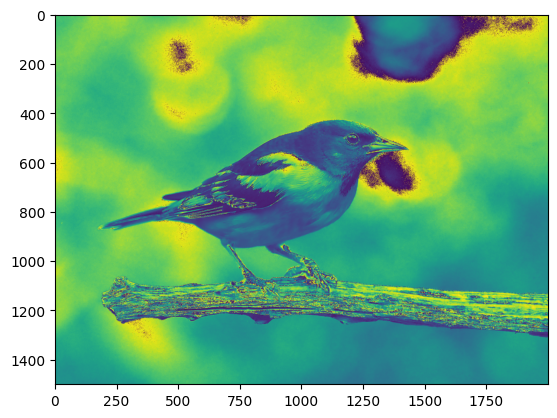

In [13]:
#2.4 màu săc với hệ RGB
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png')
bdata = (data[:,:,1] + data[:,:,2])
plt.imshow(bdata)
plt.show()

In [17]:
#2.5 Màu với hệ HSV
import numpy as np
import matplotlib.pylab as plt
import imageio.v2 as iio
import colorsys

a = colorsys.rgb_to_hsv(255, 0, 0)
print(a)
b = colorsys.rgb_to_hsv(1, 0, 0)
print(b)
c = colorsys.rgb_to_hsv(0, 255, 0)
print(c)
d = colorsys.hsv_to_rgb(1, 1, 2550)
print(d)


(0.0, 1.0, 255)
(0.0, 1.0, 1)
(0.3333333333333333, 1.0, 255)
(2550, 0.0, 0.0)


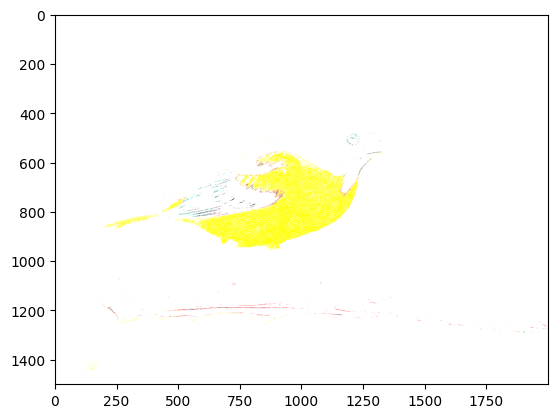

In [20]:
#2.6 Ứng dụng chuyển đổi hệ màu
#Viết chương trình thay thế giá trị kênh Hue của các pixel trong một ảnh bằng phương giá trị ban đầu của Hue
import numpy as np
import matplotlib.pylab as plt
import imageio.v2 as iio
import colorsys
rgb = iio.imread('bird.png')
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v, = rgb2hsv(rgb[:,:,0], rgb[:,:,1], rgb[:,:,2])
h *= h
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
rgb2 = hsv2rgb(h, s, v)
rgb2 = np.array(rgb2).transpose((1, 2, 0))
plt.imshow(rgb2)
plt.show()

In [30]:
#2.7 Lọc ảnh
#Lọc ảnh với mean filter
import numpy as np
import scipy.ndimage as sn
import matplotlib.pylab as plt
import imageio.v2 as iio
import colorsys

# Đọc ảnh grayscale đúng cách
a = iio.imread('bird.png', mode='F')

# Tạo kernel lọc trung bình 5x5
k = np.ones((5, 5)) / 25

# Áp dụng bộ lọc trung bình
b = sn.convolve(a, k).astype(np.uint8)

# Lưu ảnh đã lọc
iio.imwrite('bird_mean_filter.png', b)  # Sửa typo "meabn" → "mean"

# In và hiển thị ảnh
print(b)
plt.imshow(b, cmap='gray')  # Dùng cmap='gray' để hiển thị ảnh đúng màu
plt.axis('off')
plt.show()


[[119 119 119 ... 132 131 131]
 [119 119 119 ... 131 131 131]
 [120 120 119 ... 132 132 131]
 ...
 [ 89  89  89 ...  80  80  80]
 [ 89  89  89 ...  80  80  80]
 [ 90  89  89 ...  80  80  80]]


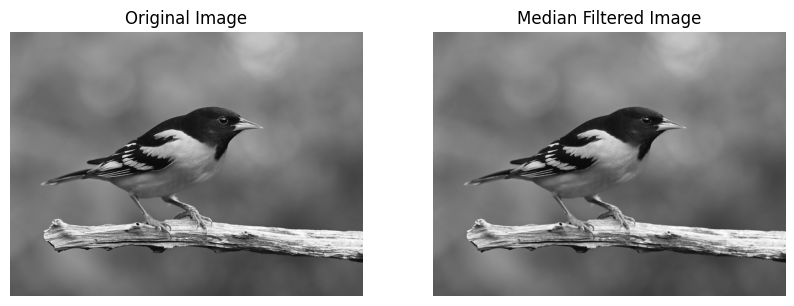

In [31]:
from os import O_ACCMODE
#Lọc ảnh với median filter
import numpy as np
import scipy.ndimage as sn
import matplotlib.pylab as plt
import imageio.v2 as iio

# Đọc ảnh grayscale
a = iio.imread('bird.png', mode='F').astype(np.uint8)

# Áp dụng median filter với kích thước cửa sổ 5x5
b = sn.median_filter(a, size=5, footprint=None, output=None,
                     mode='reflect', cval=0.0, origin=0)

# Lưu ảnh sau lọc
iio.imwrite('bird_median_filter.png', b)

# Hiển thị ảnh
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(a, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(b, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')

plt.show()


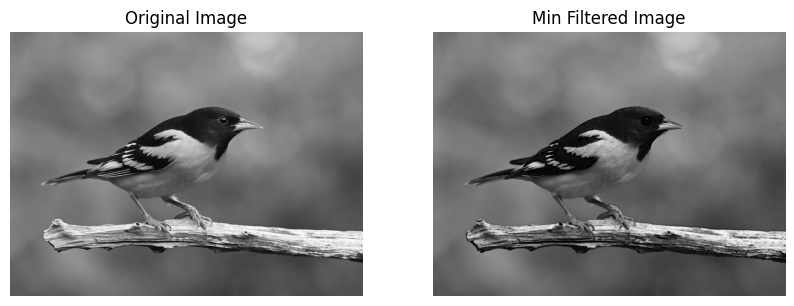

In [32]:
#Lọc ảnh với Min filter
import numpy as np
import scipy.ndimage as sn
import matplotlib.pylab as plt
import imageio.v2 as iio
import colorsys

# Đọc ảnh grayscale
a = iio.imread('bird.png', mode='F').astype(np.uint8)

# Áp dụng min filter với cửa sổ 5x5
b = sn.minimum_filter(a, size=5, footprint=None, output=None,
                     mode='reflect', cval=0.0, origin=0)

# Lưu ảnh sau khi lọc
iio.imwrite('bird_min_filter.png', b)

# Hiển thị ảnh gốc và ảnh đã lọc
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(a, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(b, cmap='gray')
plt.title('Min Filtered Image')
plt.axis('off')

plt.show()


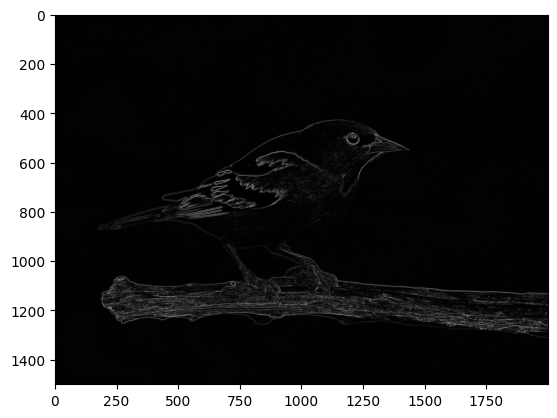

In [38]:
#2.8 Dò cạnh biên củA ảnh
import numpy as np
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pylab as plt
import imageio.v2 as iio
import colorsys

a = iio.imread('bird.png', mode ='F')
b = filters.sobel(a).astype(np.uint8)

iio.imsave('brid_sobel_filter_edge_detection.png', b)
plt.imshow(b, cmap='gray')
plt.show()

In [40]:
#Xác định biên của đối tượng trên first derivative sử dụng Prewitt filter
import numpy as np
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pylab as plt
import imageio.v2 as iio
import colorsys

a = iio.imread('bird.png', mode ='F')
b = filters.prewitt(a).astype(np.uint8)

iio.imsave('brid_prewitt_filter_edge_detection.png', b)
plt.imshow(b, cmap='gray')
plt.show()

In [42]:
#Xác định biên của đối tượng first derivative sử dụng Canny filter
import numpy as np
import scipy.ndimage as sn
from skimage import feature
import matplotlib.pylab as plt
import imageio.v2 as iio
import colorsys

a = iio.imread('bird.png', mode ='F')
b = feature.canny(a, sigma=3).astype(np.uint8)

iio.imsave('brid_prewitt_filter_edge_detection.png', b)
plt.imshow(b, cmap='gray')
plt.show()

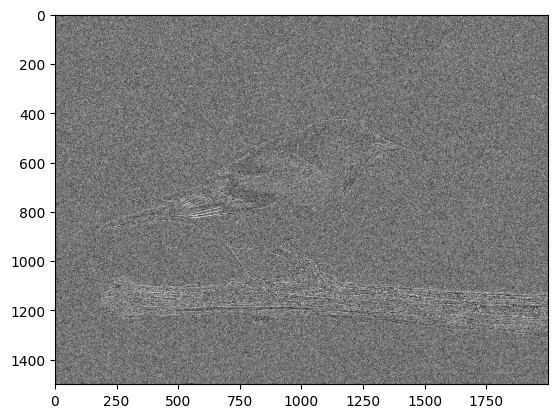

In [43]:
#Xác định đối tượng sử dụng Second derivative
#laplacian detection chỉ sử dụng 1 kênh để xác định biên của đối tượng
import numpy as np
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pylab as plt
import imageio.v2 as iio
import colorsys

a = iio.imread('bird.png', mode ='F')
b = sn.laplace(a, mode='reflect').astype(np.uint8)

iio.imsave('brid_laplace_filter_edge_detection.png', b)
plt.imshow(b, cmap='gray')
plt.show()

In [44]:
#3. Bài tập
#1. Viết chương trình nạp một ảnh và lưu thành 3 ảnh với 3 màu khác nhau
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Đọc ảnh màu
a = iio.imread('bird.png')

# Tách các kênh màu
red = a.copy()
green = a.copy()
blue = a.copy()

# Đặt giá trị của 2 kênh còn lại thành 0 để chỉ giữ lại một kênh
red[:, :, 1:] = 0  # Xoá Green và Blue kênh
green[:, :, [0, 2]] = 0  # Xoá Red và Blue kênh
blue[:, :, :2] = 0  # Xoá Red và Green kênh

# Lưu các ảnh với chỉ 1 kênh màu
iio.imwrite('bird_red.png', red)
iio.imwrite('bird_green.png', green)
iio.imwrite('bird_blue.png', blue)

# Hiển thị các ảnh để kiểm tra kết quả
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(red)
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(green)
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blue)
plt.title('Blue Channel')
plt.axis('off')

plt.show()


In [46]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Đọc ảnh màu RGB
a = iio.imread('bird.png')

# Hoán đổi các kênh màu (Ví dụ: Hoán đổi Red và Green)
swapped_rg = a.copy()
swapped_rg[:, :, [0, 1]] = swapped_rg[:, :, [1, 0]]  # Hoán đổi Red và Green

# Hoán đổi các kênh màu (Ví dụ: Hoán đổi Green và Blue)
swapped_gb = a.copy()
swapped_gb[:, :, [1, 2]] = swapped_gb[:, :, [2, 1]]  # Hoán đổi Green và Blue

# Hoán đổi tất cả các kênh (Ví dụ: Hoán đổi Red, Green, Blue)
swapped_all = a.copy()
swapped_all[:, :, [0, 1, 2]] = swapped_all[:, :, [2, 0, 1]]  # Hoán đổi Red, Green, Blue

# Lưu các ảnh hoán đổi
iio.imwrite('bird_swapped_rg.png', swapped_rg)
iio.imwrite('bird_swapped_gb.png', swapped_gb)
iio.imwrite('bird_swapped_all.png', swapped_all)

# Hiển thị ảnh gốc và ảnh đã hoán đổi
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(a)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(swapped_rg)
plt.title('Red & Green Swapped')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(swapped_gb)
plt.title('Green & Blue Swapped')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(swapped_all)
plt.title('All Channels Swapped')
plt.axis('off')

plt.show()


In [47]:
#Viết chương trình nạp ảnh, chuyển thành hệ màu HSV và lưu 3 ảnh với 3 màu khác nhau
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from skimage import color

# Đọc ảnh màu RGB
a = iio.imread('bird.png')

# Chuyển từ RGB sang HSV
a_hsv = color.rgb2hsv(a)

# Tách các kênh HSV
hue = a_hsv[:, :, 0]  # Kênh Hue
saturation = a_hsv[:, :, 1]  # Kênh Saturation
value = a_hsv[:, :, 2]  # Kênh Value

# Lưu các ảnh của các kênh
iio.imwrite('bird_hue.png', (hue * 255).astype(np.uint8))  # Hue trong khoảng [0, 255]
iio.imwrite('bird_saturation.png', (saturation * 255).astype(np.uint8))  # Saturation trong khoảng [0, 255]
iio.imwrite('bird_value.png', (value * 255).astype(np.uint8))  # Value trong khoảng [0, 255]

# Hiển thị các ảnh đã tách kênh
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(a)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(hue, cmap='hsv')  # Hiển thị Hue sử dụng colormap 'hsv'
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(saturation, cmap='gray')  # Hiển thị Saturation với colormap 'gray'
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(value, cmap='gray')  # Hiển thị Value với colormap 'gray'
plt.title('Value Channel')
plt.axis('off')

plt.show()


In [48]:
#4. Viết chướng trình nạp ảnh, chuyển sang hệ màu HSV. Lưu ảnh mới với kênh Hnew = 1/3 Hold, Vnew = 3/4Vold
import numpy as np
import imageio.v2 as iio
from skimage import color
import matplotlib.pyplot as plt

# Đọc ảnh màu RGB
a = iio.imread('bird.png')

# Chuyển từ RGB sang HSV
a_hsv = color.rgb2hsv(a)

# Lấy các kênh HSV
h = a_hsv[:, :, 0]  # Kênh Hue
s = a_hsv[:, :, 1]  # Kênh Saturation
v = a_hsv[:, :, 2]  # Kênh Value

# Áp dụng biến đổi mới
h_new = h / 3  # Hnew = 1/3 * Hold
v_new = v * 3 / 4  # Vnew = 3/4 * Vold

# Giới hạn lại giá trị H và V mới để trong khoảng [0, 1]
h_new = np.clip(h_new, 0, 1)
v_new = np.clip(v_new, 0, 1)

# Tạo ảnh mới với Hnew, S và Vnew
a_hsv_new = np.stack([h_new, s, v_new], axis=-1)

# Chuyển ảnh từ HSV về RGB
a_rgb_new = color.hsv2rgb(a_hsv_new)

# Lưu ảnh mới
iio.imwrite('bird_hsv_transformed.png', (a_rgb_new * 255).astype(np.uint8))

# Hiển thị ảnh gốc và ảnh đã biến đổi
plt.figure(figsize=(10, 5))

# Ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(a)
plt.title('Original Image')
plt.axis('off')

# Ảnh đã biến đổi
plt.subplot(1, 2, 2)
plt.imshow(a_rgb_new)
plt.title('Transformed Image (Hnew, Vnew)')
plt.axis('off')

plt.show()
